In [75]:
class Prompt:
    def get_prompt(self):
        prompt_text="""
        you are a nutrition and health expert.
        I will provide you an image of a packaged food wrapper.
        Analyse nutritional information and ingredients present on wrapper and based on your knowledge in health and nutrition rate the food item on a scale of 1-5.Give 1 rating if item has negative health impact and give 5 rating if item has positive health impact.
        """
        return prompt_text

In [76]:
import json

In [77]:
from model import *
from wrapper_image import *
#from prompt import *

class User:
    def __init__(self,user_id):
        self.user_id=user_id
    def upload_image(self,image_path):
        self.image_path=image_path
    def get_nutrition_info(self):
        prompt_obj=Prompt()
        prompt_text=prompt_obj.get_prompt()

        image_obj=WrapperImage(self.image_path)
        image=image_obj.load_image()

        model_obj=Model('gemini-pro-vision')
        output=model_obj.get_model_output(prompt_text,image)
        # pre-processing string output
        output=output.replace('json','')
        output=output.replace("```",'')

        return output

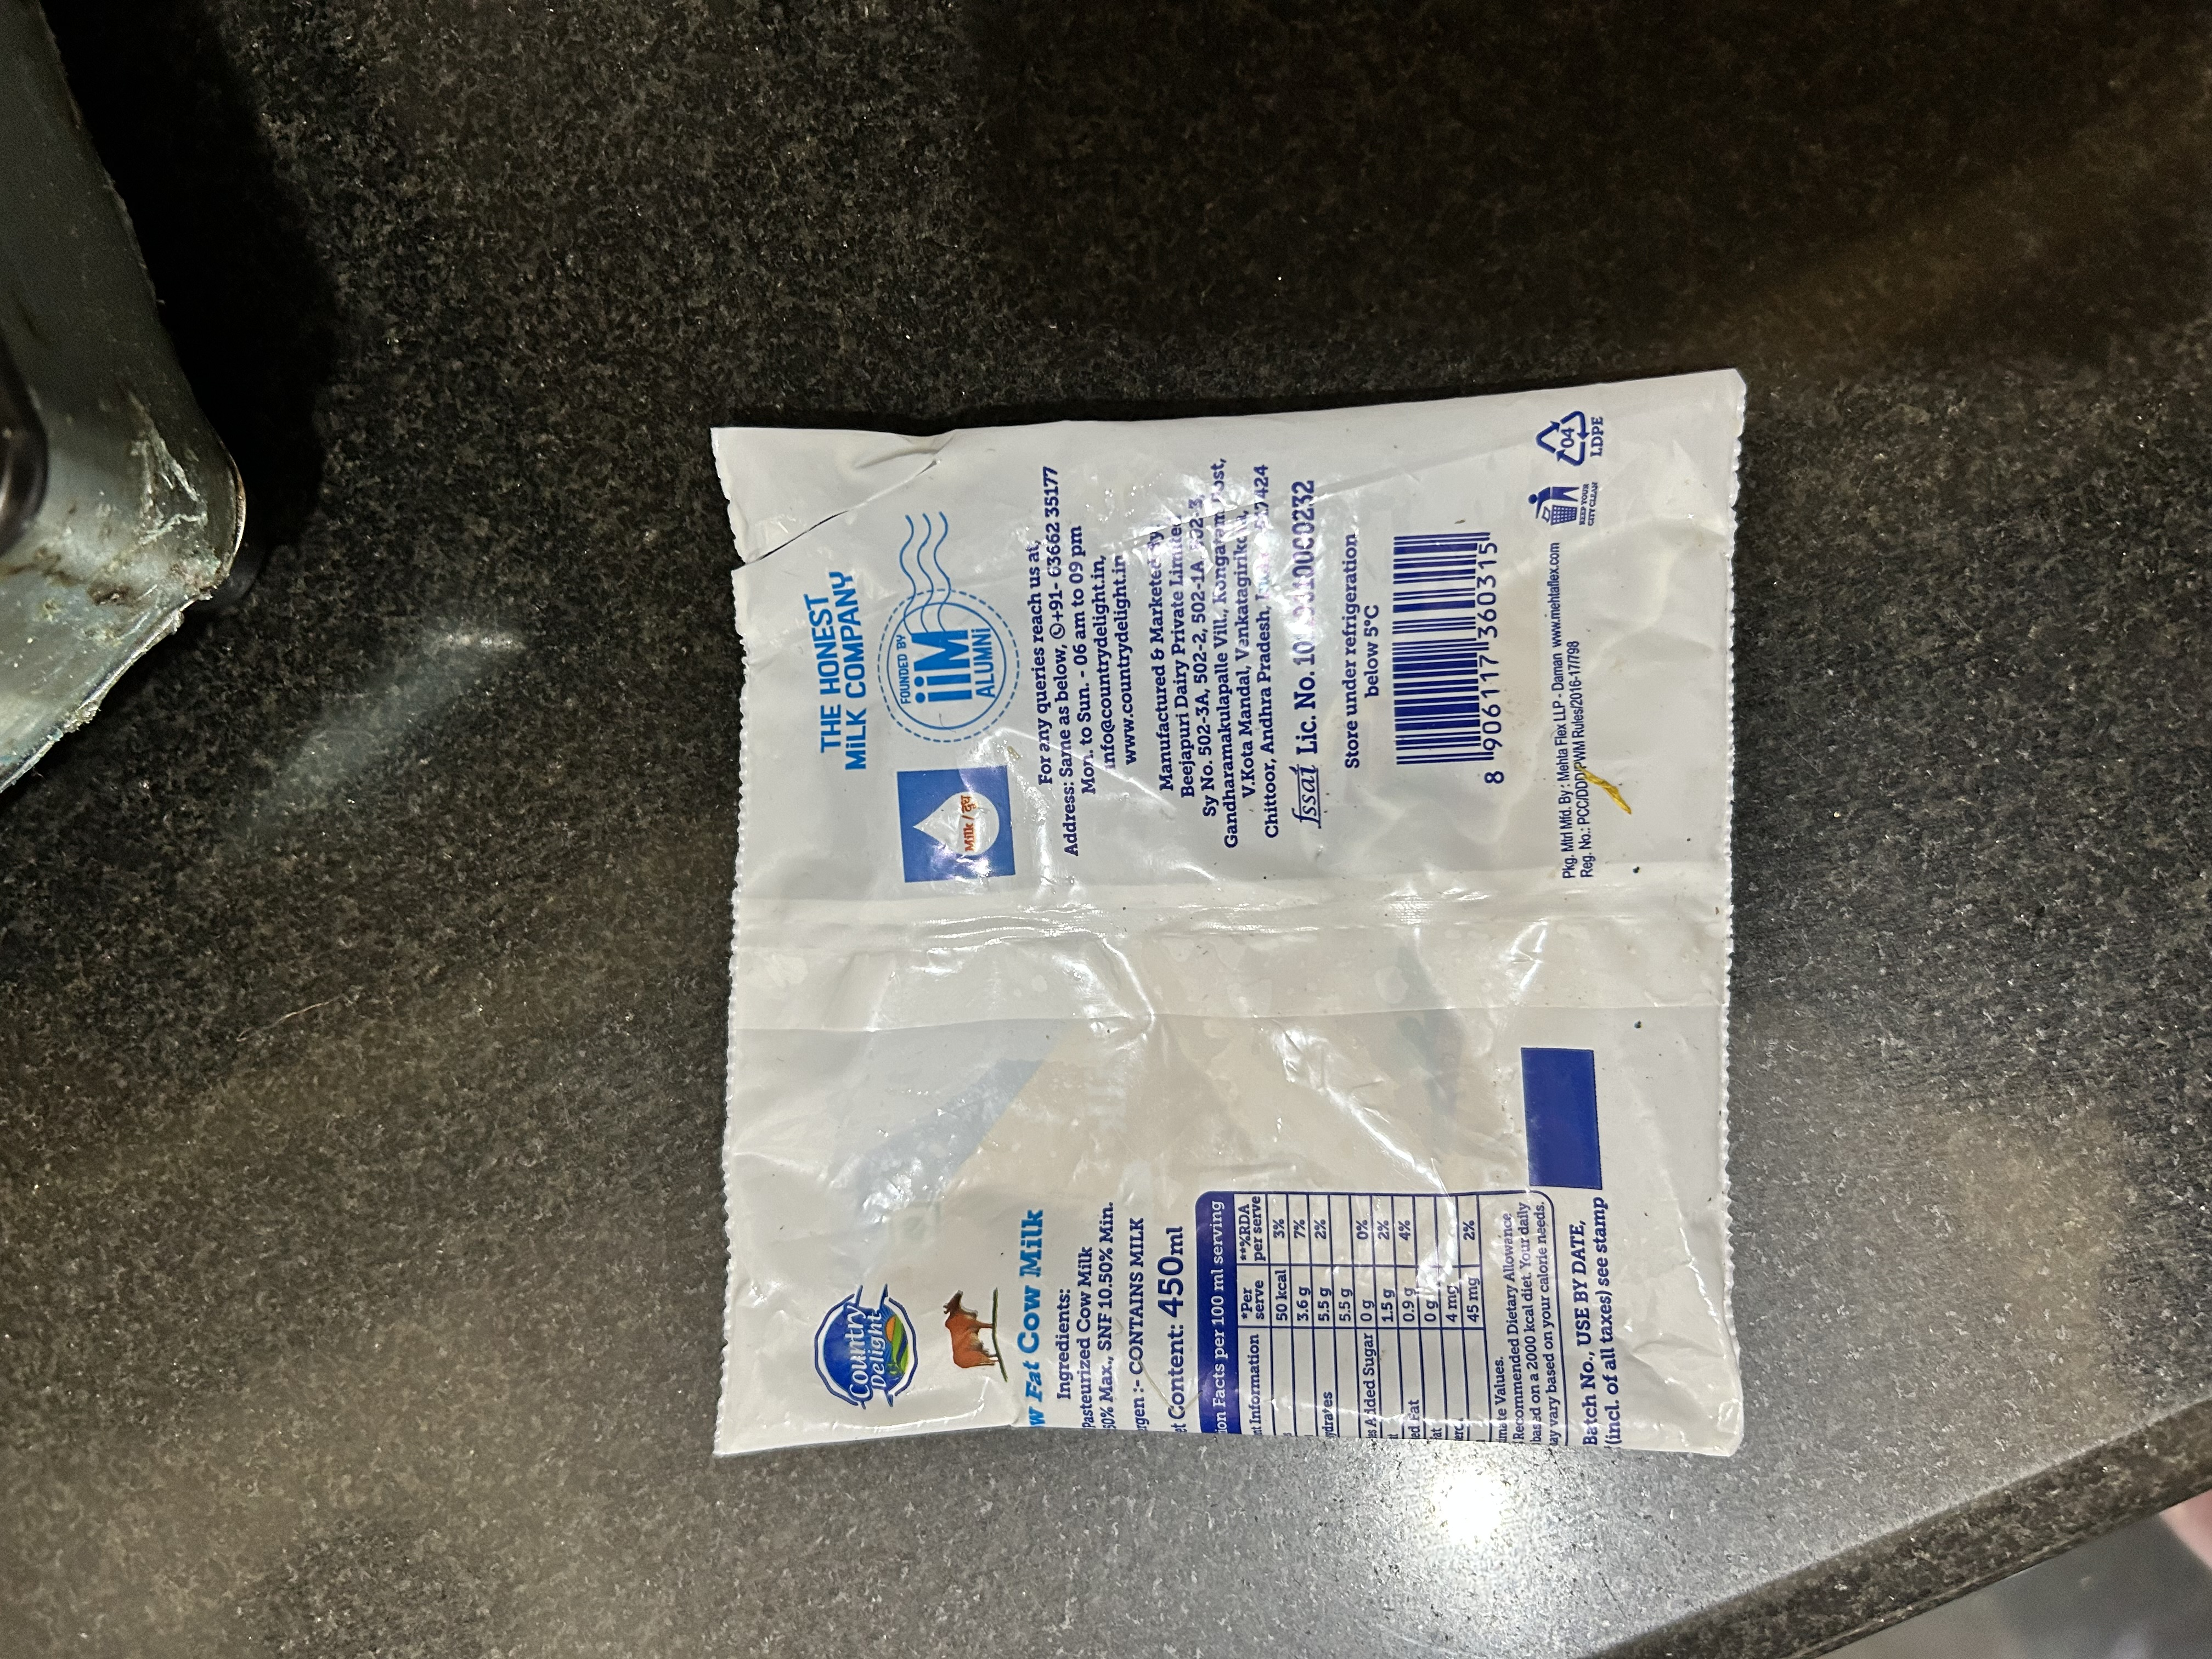

In [78]:
# from PIL import Image 
# from PIL import ImageFile

# ImageFile.LOAD_TRUNCATED_IMAGES = True

img_path='WrapperPhotos/IMG_4414.jpg'
# creating a object 
# im = Image.open(img_path) 
 
# im.show()

from IPython.display import Image
Image(filename=img_path) 

In [79]:
 # Get Nutritional information from the uploaded image
user1=User('u1')

user1.upload_image(img_path)
model_output=user1.get_nutrition_info()
print(model_output)
#model_output_json=json.loads(model_output)

 The product is a packet of toned milk. It is a good source of protein, calcium, and vitamin D. However, it is also high in saturated fat and cholesterol. Overall, the product is a good choice for those who are looking for a healthy and nutritious snack. I would give it a rating of 4 out of 5.


In [74]:
model_output_json

{'Energy Value': '400 kcal',
 'Protein': '18.5 g',
 'Carbohydrate': '57.5 g',
 'Total Sugars': '19.3 g',
 'Added Sugars': None,
 'Total Fat': '13.9 g',
 'Saturated Fat': '2.5 g',
 'Trans Fat': '0.2 g',
 'Cholestrol': '0 mg',
 'Sodium': '385 mg',
 'Dietary Fibre': '7.1 g'}